In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
#collect all the training data and separate them using"/n"
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

--2019-10-26 04:55:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-10-26 04:55:59 (97.7 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)

#now we will sepaarate a given input sequence into different lengths and pad each length
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
    
#here we need to find a maximum length for a given input sequence and we will pad the remaining lengths accordingly
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# now we need to make our training and testing dataset for the model
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
#here the the label will be the last word of agiven sequence and the training set will be the remaining sentence and we need the categorize our label dataset
label = ku.to_categorical(label, num_classes=total_words)

3211


In [0]:
#defining our model
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (N

In [0]:
istory = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 32s 2ms/sample - loss: 6.9000 - acc: 0.0206
Epoch 2/100
15462/15462 [==============================] - 32s 2ms/sample - loss: 6.4997 - acc: 0.0215
Epoch 3/100
15462/15462 [==============================] - 33s 2ms/sample - loss: 6.3850 - acc: 0.0258
Epoch 4/100
15462/15462 [==============================] - 33s 2ms/sample - loss: 6.2648 - acc: 0.0295
Epoch 5/100
15462/15462 [==============================] - 33s 2ms/sample - loss: 6.1784 - acc: 0.0350
Epoch 6/100
15462/15462 [==============================] - 33s 2ms/sample - loss: 6.0971 - acc: 0.0375
Epoch 7/100
15462/15462 [==============================] - 32s 2ms/sample - loss: 6.0166 - acc: 0.0394
Epoch 8/100
15462/15462 [==============================] - 31s 2ms/sample - loss: 5.9316 - acc: 0.0433
Epoch 9/100
15462/15462 [==============================] - 

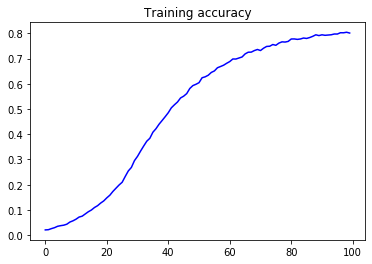

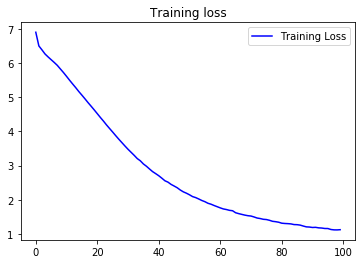

In [0]:
import matplotlib.pyplot as plt
acc = istory.history['acc']
loss = istory.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope was many a end ' remain torn light light light taken taken taken women's fashion here lived to be bad men bright true tongue ' are shown torn taken now cease light fight burn survey hate shines still there taken another needing needing good doom ill ill rhyme lend room shown young of light hate hate exchanged leaves lie you be twain you be bright bright are done see shame young to catch her growest too dwell doth dwell new grow light pain arising decay another kings rare men me be dwell still rare rare ' releasing keep me alone
